# Aquisição de Dados

O primeiro processo da Mineração de Texto, é garantir que temos os dados necessários para análise. A mineração de texto é muito dinâmica e provavelmente temos que montar um **fluxo contínuo** de aquisição dos dados necessário. Neste notebook vamos exemplificar como recuperar dados de Tweets.

### Importando bibliotecas a serem usadas

In [0]:
install.packages("rtweet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘promises’, ‘later’, ‘httpuv’



In [0]:
suppressMessages(suppressWarnings(library(rtweet)))
suppressMessages(suppressWarnings(library(dplyr)))

### Pedindo autorização

In [0]:
consumer_key <- "KyUYAmtf49hKruNv8YBRuDBN5"
consumer_secret <-"jslujvTkyY3qXDOBVQbejOo1gsdkxS9QSNdEiF3m3writH78ti"
access_token <- "39973284-NJl3uJ580fix9PUiCOYOmb9GCh0jW4K7oZITrRLLR"
access_secret <- "Pb4bCkM6bZaxR3uh6WKOj31PsDLKQbzaBp12VQs1j37iW"

In [0]:
## authenticate via access token
token <- create_token(
  app = "CTV_Data_Analytics",
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret)

In [0]:
token

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> CTV_Data_Analytics
  key:    KyUYAmtf49hKruNv8YBRuDBN5
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret
---

### Download dos dados
Veja o que esse biblioteca pode fazer em: https://rtweet.info/

Verifique quais outras funções existem na biblioteca. Recupere trends do Brasil, do Rio de Janeiro, recupere tweets procurando por hashtags, etc

https://rtweet.info/reference/index.html

## 1) Recupere tweets do seu interesse. Pode ser trends, uma hashtag específica ou até mesmo os tweets de um usuário

In [0]:
## Buscando 200 tweets com uma hastag específica
tweets <- search_tweets(
  "Lava Jato", n = 2000, include_rts = FALSE, retryonratelimit = TRUE
)
tweets

retry on rate limit...
waiting about 2 minutes...


user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
876955408002318336,1141808136900239360,2019-06-20 20:40:48,edi140689giu,"Assista a ""HEITA! Azevedo diz que antecipará trecho inédito de conversa da Lava Jato daqui a pouco"" no YouTube https://t.co/hEucAIQRrJ",Twitter Web App,134,NA,NA,NA,⋯,1219,85,2017-06-20 00:10:37,FALSE,NA,NA,pt,NA,NA,http://pbs.twimg.com/profile_images/901242329587232768/qwZ8VF1g_normal.jpg
980857200,1141808129144963072,2019-06-20 20:40:46,SilviaH72669535,"Todos os pilantras da Lava a Jato apagaram tudo do Telegram e de outras redes? Nossa, que coincidência (estúpida rsrs) se juntarem para fazer o ""apagamento"" ao mesmo tempo, né? 😁 https://t.co/4BSypezdju",Facebook,202,NA,NA,NA,⋯,26373,351,2012-11-30 17:15:46,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/980857200/1431210347,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/597165326695006208/sud8Qjia_normal.jpg
980857200,1141382474452340736,2019-06-19 16:29:22,SilviaH72669535,Véio GagáC se deu bem com a Qudrilha da Lava a Jato. https://t.co/EyBSXwD8ki,Facebook,76,NA,NA,NA,⋯,26373,351,2012-11-30 17:15:46,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/980857200/1431210347,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/597165326695006208/sud8Qjia_normal.jpg
980857200,1141380288070717446,2019-06-19 16:20:41,SilviaH72669535,Glenn Gleenwald ajude ao Tacla Duran. Por favor. https://t.co/RjZENSKCrX,Facebook,72,NA,NA,NA,⋯,26373,351,2012-11-30 17:15:46,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/980857200/1431210347,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/597165326695006208/sud8Qjia_normal.jpg
980857200,1141433589927751680,2019-06-19 19:52:29,SilviaH72669535,#BandidoMoro rato da Lava a Jato. https://t.co/Zwyy1PUTzQ,Facebook,57,NA,NA,NA,⋯,26373,351,2012-11-30 17:15:46,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/980857200/1431210347,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/597165326695006208/sud8Qjia_normal.jpg
980857200,1141683335607005184,2019-06-20 12:24:53,SilviaH72669535,Vão manter a postura de defender a Vaza a Jato? Não é possível. https://t.co/aGJdQb4PYb,Facebook,87,NA,NA,NA,⋯,26373,351,2012-11-30 17:15:46,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/980857200/1431210347,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/597165326695006208/sud8Qjia_normal.jpg
1106698472877641728,1141808094592327686,2019-06-20 20:40:38,ArmandoPiccini2,"Dia 30/06 estaremos nas ruas de todo país, participando das manifestações para defender: - DECRETO DAS ARMAS - CANDIDARURAS INDEPENDENTES - APROVAÇÃO PACOTE ANTICRIME - APOIO À LAVA JATO - APOIO AO SÉRGIO MORO Clique aqui: https://t.co/EhH7lwnYQk https://t.co/81jI1mhd5j https://t.co/1nGdqGH8fS https://t.co/FFxz9dlPv3",Twitter for Android,299,NA,NA,NA,⋯,466,491,2019-03-15 23:27:32,FALSE,NA,NA,pt,NA,NA,http://pbs.twimg.com/profile_images/1135130245894483968/ing9fYrz_normal.jpg
1106698472877641728,1141808026736836617,2019-06-20 20:40:21,ArmandoPiccini2,"@marcosdoval Dia 30/06 estaremos nas ruas de todo país, participando das manifestações para defender: - DECRETO DAS ARMAS - CANDIDARURAS INDEPENDENTES - APROVAÇÃO PACOTE ANTICRIME - APOIO À LAVA JATO - APOIO AO SÉRGIO MORO Clique aqui: https://t.co/EhH7lwnYQk https://t.co/81jI1mhd5j https://t.co/BYQAwJWsio",Twitter for Android,275,1141803423295332352,54600557,marcosdoval,⋯,466,491,2019-03-15 23:27:32,FALSE,NA,NA,pt,NA,NA,http://pbs.twimg.com/profile_images/1135130245894483968/ing9fYrz_

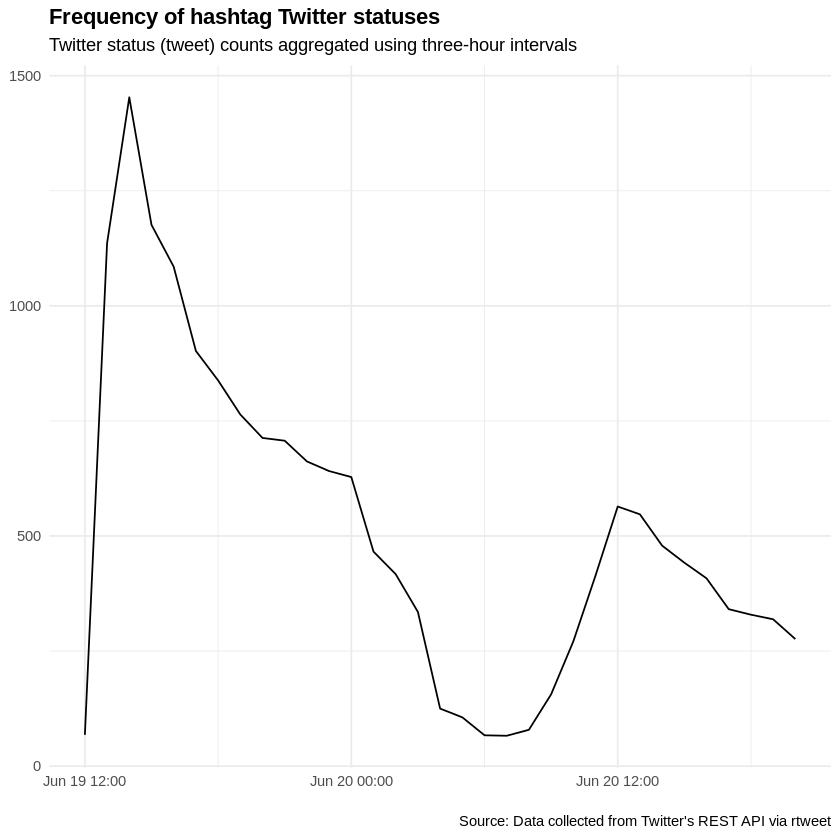

In [0]:
## plot time series of tweets
tweets %>%
  ts_plot("hours") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of hashtag Twitter statuses",
    subtitle = "Twitter status (tweet) counts aggregated using three-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

In [0]:
trends_codes <- trends_available()
filter(trends_codes, countryCode == "BR")
location <-  pull(filter(trends_codes, name == "Rio de Janeiro")["woeid"])
trends <- get_trends(woeid = location)
trends

name,url,parentid,country,woeid,countryCode,code,place_type
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>
Brasília,http://where.yahooapis.com/v1/place/455819,23424768,Brazil,455819,BR,7,Town
Belém,http://where.yahooapis.com/v1/place/455820,23424768,Brazil,455820,BR,7,Town
Belo Horizonte,http://where.yahooapis.com/v1/place/455821,23424768,Brazil,455821,BR,7,Town
Curitiba,http://where.yahooapis.com/v1/place/455822,23424768,Brazil,455822,BR,7,Town
Porto Alegre,http://where.yahooapis.com/v1/place/455823,23424768,Brazil,455823,BR,7,Town
Recife,http://where.yahooapis.com/v1/place/455824,23424768,Brazil,455824,BR,7,Town
Rio de Janeiro,http://where.yahooapis.com/v1/place/455825,23424768,Brazil,455825,BR,7,Town
Salvador,http://where.yahooapis.com/v1/place/455826,23424768,Brazil,455826,BR,7,Town
São Paulo,http://where.yahooapis.com/v1/place/455827,23424768,Brazil,455827,BR,7,Town


trend,url,promoted_content,query,tweet_volume,place,woeid,as_of,created_at
<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<dttm>,<dttm>
#Señorita,http://twitter.com/search?q=%23Se%C3%B1orita,NA,%23Se%C3%B1orita,154368,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
O Naruto,http://twitter.com/search?q=%22O+Naruto%22,NA,%22O+Naruto%22,NA,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
#waitingforanitta,http://twitter.com/search?q=%23waitingforanitta,NA,%23waitingforanitta,NA,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
#SWEUSA,http://twitter.com/search?q=%23SWEUSA,NA,%23SWEUSA,14142,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
#VoleiNoSporTV,http://twitter.com/search?q=%23VoleiNoSporTV,NA,%23VoleiNoSporTV,NA,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
#Lights,http://twitter.com/search?q=%23Lights,NA,%23Lights,255107,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
Marcha,http://twitter.com/search?q=Marcha,NA,Marcha,51583,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
Coraline,http://twitter.com/search?q=Coraline,NA,Coraline,NA,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24
Jean Lucas,http://twitter.com/search?q=%22Jean+Lucas%22,NA,%22Jean+Lucas%22,15633,Rio de Janeiro,455825,2019-06-20 20:50:30,2019-06-20 20:39:24


## 2) Salvando nossos tweets para mais tarde
Salve seus tweets para explorarmos mais depois

In [0]:
#Salvando os tweets
save_as_csv(tweets, 'tweets.csv', prepend_ids = TRUE, na = "",
  fileEncoding = "UTF-8")

#Salvando os trends
save_as_csv(trends, 'trends.csv', prepend_ids = TRUE, na = "",
  fileEncoding = "UTF-8")